## Open3D Tutorial
### Point cloud
#### Visualize point cloud
importing necessary libraries

In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

Data files should be downloaed from Github
> [fragment.ply]((https://github.com/intel-isl/Open3D/blob/master/examples/test_data/fragment.ply))

In [3]:
print("Load a ply point cloud, print it, and render it")
pcd = o3d.io.read_point_cloud("fragment.ply")
print(pcd)
#print(np.asarray(pcd.points))
print(np.asarray(pcd.colors))
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024]
                                  )

Load a ply point cloud, print it, and render it
PointCloud with 196133 points.
[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 ...
 [0.92941176 0.89019608 0.87058824]
 [0.87843137 0.81960784 0.79215686]
 [0.87843137 0.81960784 0.79215686]]


In [18]:
print(pcd.colors[-1])
print(len(pcd.colors))
#k, idx = np.where(np.asarray(pcd.colors)==[[0., 0., 0.]])
#pcd.colors[np.where(np.asarray(pcd.colors)==[0., 0., 0.])] = [1. 0. 0.]


[0.87843137 0.81960784 0.79215686]
196133


In [21]:
for i in range(len(pcd.colors)):
    if pcd.colors[i].all() == 0.:
        pcd.colors[i] = [0., 0., 1.]

In [22]:
o3d.visualization.draw_geometries([pcd])

o3d.visualization.draw_geometries method wokrs without options

In [4]:
o3d.visualization.draw_geometries([pcd])

## File IO
Read pcd, xyz, pts, ply(Polygon File Format)

### Point Cloud
> * Formats
>> **xyz** : Each line contatins **\[x, y, z\]** where x, y, z are 3D coordinates</br>
<br> **xyzn** : Each line contatins **\[x, y, z, nx, ny, nz\]**, where nx, ny, nz are normals</br>
<br> **xyzrgb** : Each line contatins **\[x, y, z, r, g, b\]**, where r, g, b are in floats of range \[0, 1\]</br>
<br> **pts** : The first line is an integer representing the number of points. Each subsequent line contatins **\[x, y, z, i, r, g, b\]**, where r, g, b are in uint8</br>
<br> **ply** : [Polygon File Format](http://paulbourke.net/dataformats/ply/)</br>
<br> **pcd** : [Point Cloud Data](http://pointclouds.org/documentation/tutorials/pcd_file_format.html)</br>
> * Method : pcd = o3d.io.read_point_cloud("../../test_data/my_points.txt", format='xyz')

In [5]:
print("Testing IO for point cloud ...")
xyz = o3d.io.read_point_cloud("my_point.txt", format='xyz')
print(xyz)
o3d.visualization.draw_geometries([xyz],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024]) # cannot see anything

Testing IO for point cloud ...
PointCloud with 4 points.


## Transform Point Cloud Data to a mesh
Ref: [Creating a mesh from a 3D point cloud from inside a tunnel](https://github.com/intel-isl/Open3D/issues/2346)

***It seems to solve this very hard only with Open3D***

> - import o3d
> - import pyvista as pv
> - import numpy as np
> - pcd = o3d.geometry.PointCloud()
> - pcd.points = o3d.utility.Vector3dVector(point_cloud)
> - downpcd = pcd.voxel_down_sample(voxel_size=0.2)
> - downsampled_point_cloud = np.asarray(downpcd.points)
> - cloud = pv.PolyData(downsampled_point_cloud).extract_geometry().triangulate()
> - volume = cloud.delaunay_3d(alpha=.3)

In [6]:
o3d.visualization.draw_geometries([xyz])
#xyz.estimate_normals()

# Estimate normals of points
xyz.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=1, max_nn=30)) # radius to fit the data
o3d.visualization.draw_geometries([xyz])

# Creat the mesh
radii = [0.75, 1]
rec_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(xyz, o3d.utility.DoubleVector(radii))

# Write the mesh
o3d.io.write_triangle_mesh("my_point.ply", rec_mesh)

# plot the mesh
o3d.visualization.draw_geometries([rec_mesh])

In [18]:
# Read the transformed my_point.ply
myPoint = o3d.io.read_triangle_mesh("my_point.ply")
o3d.visualization.draw_geometries([myPoint])

# Compute vertex_normals()
myPoint.compute_vertex_normals()
o3d.visualization.draw_geometries([myPoint])

# Set a color
print("Paint myPoint")
myPoint.paint_uniform_color([1, 0.706, 0])
o3d.visualization.draw_geometries([myPoint]) # It's OK but there is an view angle where the object is not visible

Paint myPoint


In [7]:
print("Testing IO for point cloud ...")
pcd = o3d.io.read_point_cloud("fragment.pcd")
print(pcd)
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

Testing IO for point cloud ...
PointCloud with 113662 points.


### Practice(Example) 
Ref: [Creating a mesh from a 3D point cloud from inside a tunnel](https://github.com/intel-isl/Open3D/issues/2346) by shakasaki

In [8]:
import numpy as np
import open3d as o3d

# Import the point cloud using numpy and store as o3d object
point_cloud = np.load('point_cloud.npz')
print('point_cloud\n', np.asarray(point_cloud['arr_0']))
point_cloud = np.asarray(point_cloud['arr_0'])

# Pass numpy array to Open3D
pcd_tunnel = o3d.geometry.PointCloud()
pcd_tunnel.points = o3d.utility.Vector3dVector(point_cloud)
o3d.visualization.draw_geometries([pcd_tunnel]) # OK

# Downsample with a voxel size of 10 cm
voxel_down_pcd = pcd_tunnel.voxel_down_sample(voxel_size=0.1)
o3d.visualization.draw_geometries([voxel_down_pcd])

## compute_vertex_normals() not working
# voxel_down_pcd.compute_vertex_normals()
# o3d.visualization.draw_geometries([voxel_down_pcd])

# Estimate normals of points
voxel_down_pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30)) # radius to fit the data
o3d.visualization.draw_geometries([voxel_down_pcd]) # OK


# Creat the mesh
radii = [0.25, 0.5]
rec_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(voxel_down_pcd, o3d.utility.DoubleVector(radii))

#pcd_tunel.compute_vertex_normals() # error
o3d.visualization.draw_geometries([rec_mesh])

#o3d.io.write_point_cloud("tunnel.ply", pcd_tunnel)

# Set a color
print("Paint mesh")
rec_mesh.paint_uniform_color([1, 0.706, 0])
o3d.visualization.draw_geometries([rec_mesh])


point_cloud
 [[2.67976251e+06 1.15155309e+06 1.48513700e+03]
 [2.67976247e+06 1.15155314e+06 1.48508000e+03]
 [2.67976247e+06 1.15155313e+06 1.48512400e+03]
 ...
 [2.67961294e+06 1.15171768e+06 1.48883900e+03]
 [2.67961288e+06 1.15171774e+06 1.48883300e+03]
 [2.67961283e+06 1.15171778e+06 1.48884200e+03]]
Paint mesh


In [10]:
import open3d as o3d
import pyvista as pv
import numpy as np

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(point_cloud)
downpcd = pcd.voxel_down_sample(voxel_size=0.2)
downsampled_point_cloud = np.asarray(downpcd.points)
cloud = pv.PolyData(downsampled_point_cloud).extract_geometry().triangulate()
volume = cloud.delaunay_3d(alpha=.3)
volume.plot()
#o3d.visualization.draw_geometries([volume])

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## [PyVista package](https://docs.pyvista.org/)

In [6]:
#!pip install pyvista

  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached transforms3d-0.3.1-py3-none-any.whl
  Using cached imageio-2.9.0-py3-none-any.whl (3.3 MB)


### [ipyvtklink](https://github.com/Kitware/ipyvtklink) package should be installed
> pip install ipyvtklink 
or
> conda install -c conda-forge ipyvtklink


In [2]:
from pyvista import examples
examples.plot_wave() # something is not correct even though it draws 3d wave

ViewInteractiveWidget(height=600, layout=Layout(height='auto', width='100%'), width=800)

pyvista_ndarray([[-10.        , -10.        ,   0.99754386],
                 [-10.        ,  -9.75      ,   0.96995273],
                 [-10.        ,  -9.5       ,   0.91344603],
                 ...,
                 [  9.75      ,   9.25      ,   0.71612791],
                 [  9.75      ,   9.5       ,   0.82573956],
                 [  9.75      ,   9.75      ,   0.91159232]])

In [3]:
from pyvista import examples
mesh = examples.download_st_helens()
warped = mesh.warp_by_scalar('Elevation')
warped.plot(cmap='jet')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

#### Simple Point Cloud with Numpy

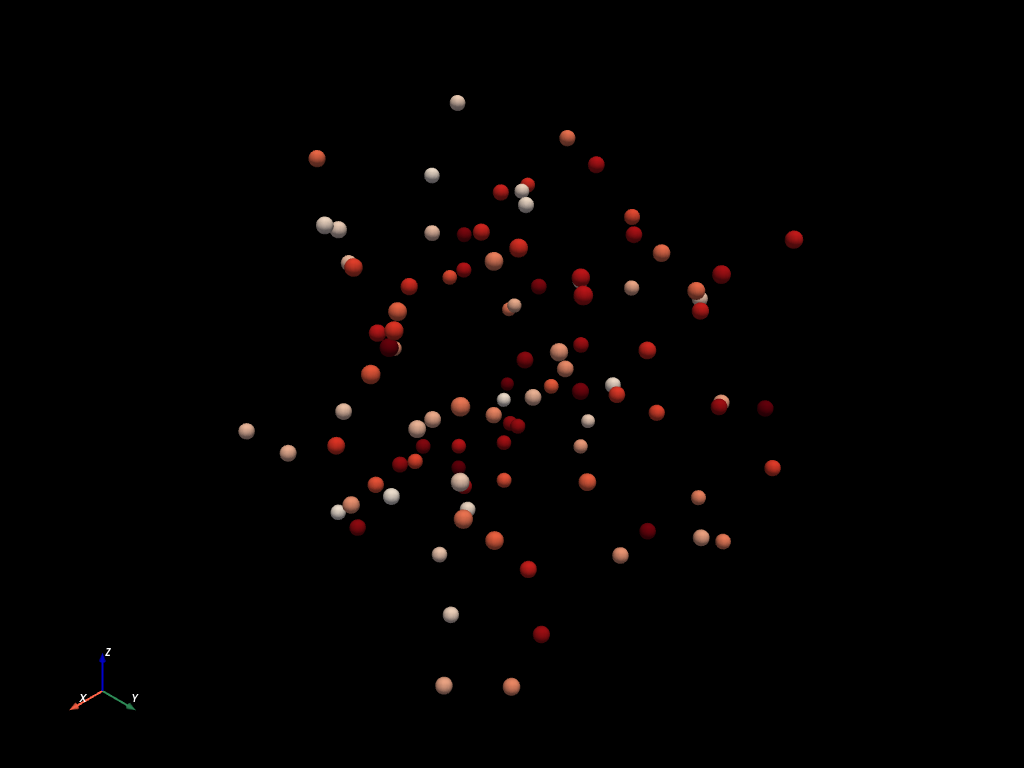

In [9]:
import numpy as np
import pyvista

point_cloud = np.random.random((100, 3))
pdata = pyvista.PolyData(point_cloud)
pdata['orig_sphere'] = np.arange(100)

# create many spheres from the point cloud
sphere = pyvista.Sphere(radius=0.02)
pc = pdata.glyph(scale=False, geom=sphere)
pc.plot(background='black', cmap='Reds', show_scalar_bar=False)

#### Plot a Spline

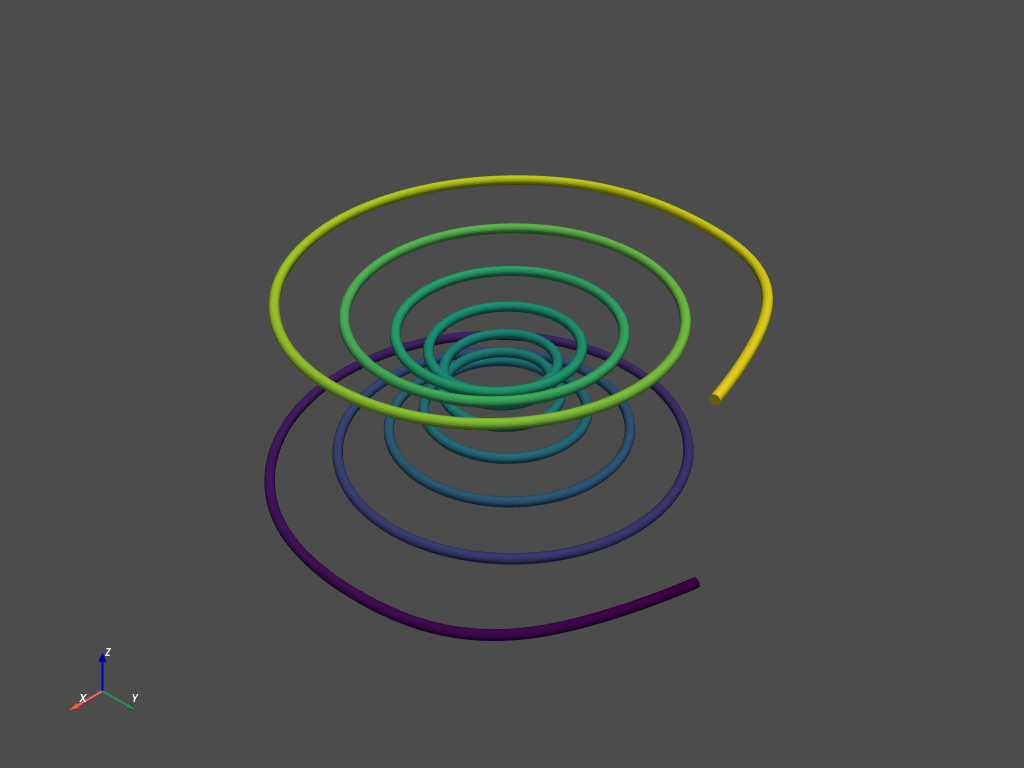

In [10]:
import numpy as np
import pyvista

# Make the xyz points
theta = np.linspace(-10 * np.pi, 10 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
points = np.column_stack((x, y, z))

spline = pyvista.Spline(points, 1000).tube(radius=0.1)

# done here to get it to render online
line = spline.cast_to_unstructured_grid().extract_surface()
line.plot(show_scalar_bar=False)

#### Boolean Operations on Meshes

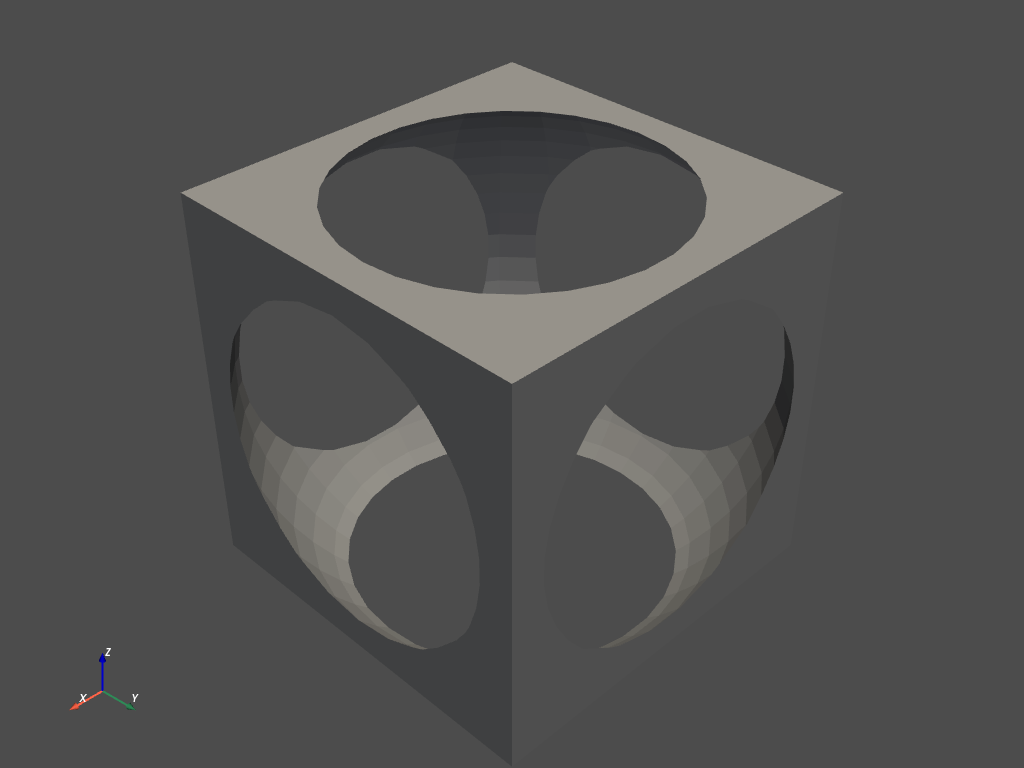

In [11]:
import pyvista
import numpy as np

def make_cube():
    x = np.linspace(-0.5, 0.5, 25)
    grid = pyvista.StructuredGrid(*np.meshgrid(x, x, x))
    return grid.extract_surface().triangulate()

# Create example PolyData meshes for boolean operations
sphere = pyvista.Sphere(radius=0.65, center=(0, 0, 0))
cube = make_cube()

# Perform the union
union = sphere.boolean_union(cube)
union.plot(color='darkgrey')

### Plotting a Mesh using Python's VTK

In [22]:
import vtk

# create reader
reader = vtk.vtkSTLReader()
reader.SetFileName("test.stl")

mapper = vtk.vtkPolyDataMapper()
if vtk.VTK_MAJOR_VERSION <= 5:
    mapper.SetInput(reader.GetOutput())
else:
    mapper.SetInputConnection(reader.GetOutputPort())

# create actor
actor = vtk.vtkActor()
actor.SetMapper(mapper)

# Create a rendering window and renderer
ren = vtk.vtkRenderer()
renWin = vtk.vtkRenderWindow()
renWin.AddRenderer(ren)

# Create a renderwindowinteractor
iren = vtk.vtkRenderWindowInteractor()
iren.SetRenderWindow(renWin)

# Assign actor to the renderer
ren.AddActor(actor)

# Enable user interface interactor
iren.Initialize()
renWin.Render()
iren.Start()

# clean up objects
del iren
del renWin

### Plot a Mesh using PyVista

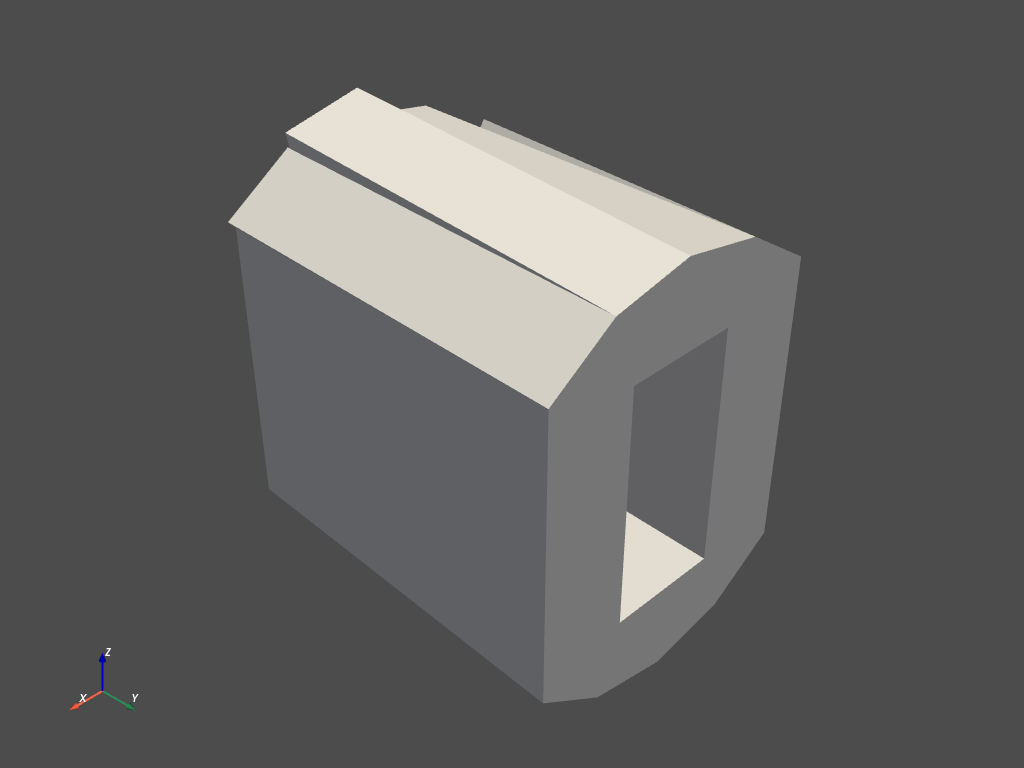

In [28]:
import pyvista

mesh = pyvista.PolyData('test.stl')
mesh.plot()

### Advanced Plotting with Numpy

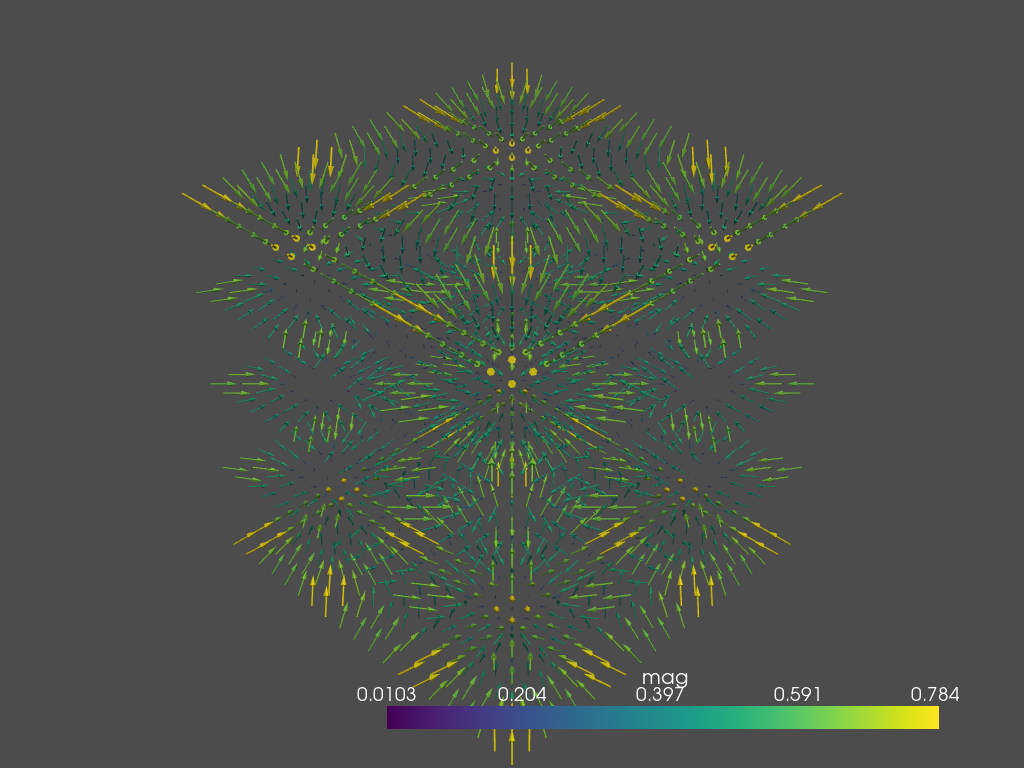

In [24]:
import pyvista
import numpy as np

# Make a grid
x, y, z = np.meshgrid(np.linspace(-5, 5, 20),
                      np.linspace(-5, 5, 20),
                      np.linspace(-5, 5, 5))

points = np.empty((x.size, 3))
points[:, 0] = x.ravel('F')
points[:, 1] = y.ravel('F')
points[:, 2] = z.ravel('F')

# Compute a direction for the vector field
direction = np.sin(points)**3

# plot using the plotting class
pl = pyvista.Plotter()
pl.add_arrows(points, direction, 0.5)
pl.show()

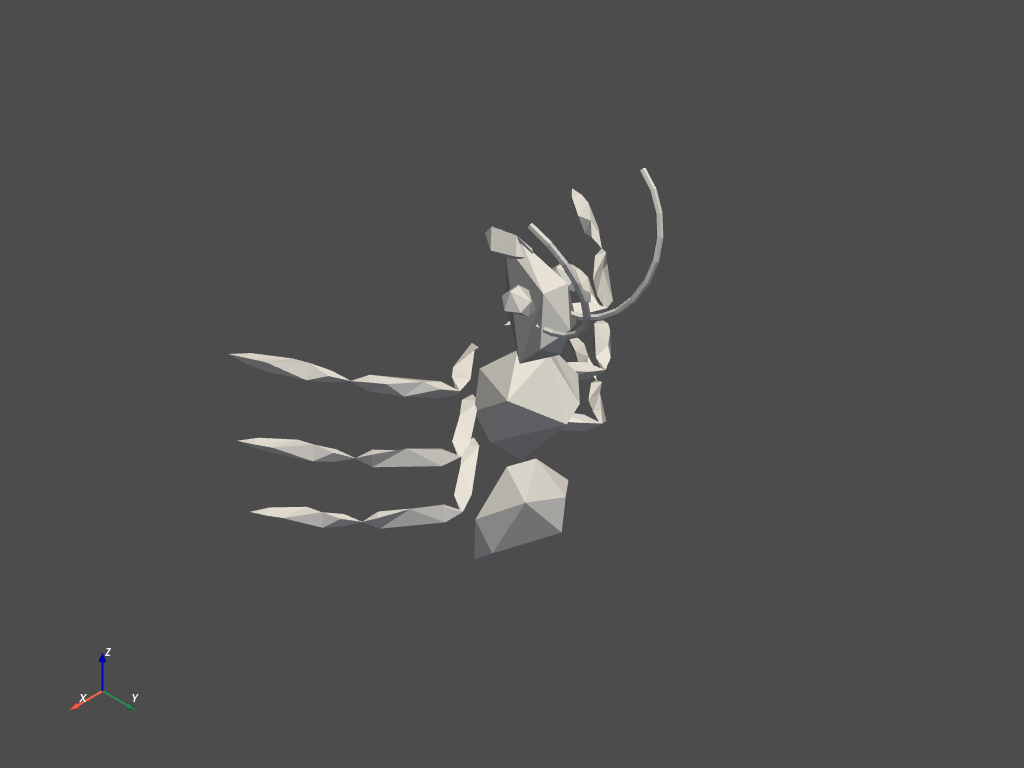

In [31]:
from pyvista import examples
mesh = examples.load_ant()
mesh.plot()

### Mesh
> * Formats: ply, stl, obj, off(Object File Format), gltf/glb(GL Transmission Format)
> * Method: o3d.io.read_triangle_mesh("knot.ply"), o3d.io.write_triangle_mesh("copy_knot.ply")

In [7]:
print("Testing IO for meshes ...")
mesh = o3d.io.read_triangle_mesh("knot.ply")
mesh.compute_vertex_normals()
print(mesh)
o3d.visualization.draw_geometries([mesh],
                                zoom=0.3412,
                                front=[0.4257, -0.2125, -0.8795],
                                lookat=[2.6172, 2.0475, 1.532],
                                up=[-0.0694, -0.9768, 0.2024]
                                )
#o3d.io.write_triangle_mesh("copy_knot.ply", mesh)

Testing IO for meshes ...
TriangleMesh with 1440 points and 2880 triangles.


In [8]:
print("Testing IO for STL format ...")
stl = o3d.io.read_triangle_mesh("test.stl")
stl.compute_vertex_normals()
#print(stl)
o3d.visualization.draw_geometries([stl],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

Testing IO for STL format ...


Testing IO for images ...


True

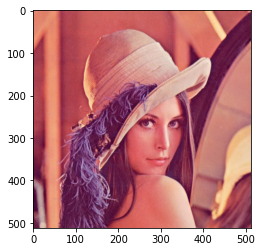

In [9]:
print("Testing IO for images ...")
img = o3d.io.read_image("lena_color.jpg")
#print(img)
plt.imshow(img)
o3d.io.write_image("copy_lena_color.jpg", img)


## Voxel downsampling
Voxel downsampling uses a regular voxel grid to create a uniformly downsampled point cloud from an input point cloud. It is often used as a pre-processing step for many point cloud processing tasks. The algorithm operates in two steps:
> 1. Points are bucketed into voxels.
> 2. Each occupied voxel generates exactly one point by averaging all points inside.

In [10]:
print("Downsample the point cloud with a voxel of 0.05")
downpcd = pcd.voxel_down_sample(voxel_size=0.05)
print("Shape: ", downpcd)
o3d.visualization.draw_geometries([downpcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

Downsample the point cloud with a voxel of 0.05
Shape:  PointCloud with 2756 points.


## Vertex normal estimation
Another basic operation for point cloud is point normal estimation. Press **[N]** to see point normals. The keys **[-]** and **[+]** can be used to control the length of the normal.

In [11]:
print("Recompute the normal of the downsampled point cloud")
downpcd.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
o3d.visualization.draw_geometries([downpcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024],
                                  point_show_normal=True)

Recompute the normal of the downsampled point cloud


In [12]:
# fragment.ply with vertex normal estimation
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024],
                                  point_show_normal=True)

**estimate_normals** computes the normal for every point. The function finds adjacent points and calculates the pricipal axis of the adjacent points using covariance analysis.

The function takes an instance of **KDTreeSearchParamHybrid** class as an argument. The two key arguments **radius = 0.1** and **max_nn = 30** specifies search radius and maximum nearest neighbor. It has 10cm of search radius, and only considers up to 30 neighbors to save computation time.

### Note:
The covariance analysis algorithm produces two opposite directions as normal candidates. Without knowing the global structure of the geometry, both can be correct. This is known as the normal orientation problem. Open3D tries to orient the normal to align with the original normal if it exists. Otherwise, Open3D does a random guess. Further orientation functions such as **orient_normals_to_align_with_direction** and **orient_normals_towards_camera_location** need to be called if the orientation is a concern.

## Access estimated vertex normal
Estimated normal vectors can be retrieved from the **normals** variable of **downpcd**.

In [13]:
print("Print a normal vector of the 0th point")
print(downpcd.normals[0])

Print a normal vector of the 0th point
[ 0.05173797  0.08319782 -0.99518908]


In [14]:
help(downpcd.normals)

Help on Vector3dVector in module open3d.cpu.pybind.utility object:

class Vector3dVector(pybind11_builtins.pybind11_object)
 |  Convert float64 numpy array of shape ``(n, 3)`` to Open3D format.
 |  
 |  Example usage
 |  
 |  .. code-block:: python
 |  
 |      import open3d
 |      import numpy as np
 |  
 |      pcd = open3d.geometry.PointCloud()
 |      np_points = np.random.rand(100, 3)
 |  
 |      # From numpy to Open3D
 |      pcd.points = open3d.utility.Vector3dVector(np_points)
 |  
 |      # From Open3D to numpy
 |      np_points = np.asarray(pcd.points)
 |  
 |  Method resolution order:
 |      Vector3dVector
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __bool__(...)
 |      __bool__(self: open3d.cpu.pybind.utility.Vector3dVector) -> bool
 |      
 |      Check whether the list is nonempty
 |  
 |  __contains__(...)
 |      __contains__(self: open3d.cpu.pybind.utility.Vector3dVector, x: numpy.ndarray[float64[3, 1]]

In [15]:
# Transforming numpy as array
randPcd = o3d.geometry.PointCloud()
np_points = np.random.rand(100, 3)

# From numpy to Open3D
randPcd.points = o3d.utility.Vector3dVector(np_points)
print(randPcd)
#print(type(randPcd.points))
#print("Shape: ", randPcd.points.shape) #has no attribute 'shape'

# From Open3D to numpy
np_points_pcd = np.asarray(randPcd.points)

o3d.visualization.draw_geometries([randPcd])

PointCloud with 100 points.


In [16]:
np_points[:10, :]

array([[0.26108105, 0.57260045, 0.17864185],
       [0.20437745, 0.40013391, 0.97493581],
       [0.16090862, 0.95454983, 0.62378197],
       [0.34581026, 0.36776398, 0.71082896],
       [0.31066951, 0.91744652, 0.76512932],
       [0.26189837, 0.08857733, 0.13394439],
       [0.88787941, 0.98259184, 0.28157277],
       [0.7849975 , 0.42356627, 0.54224653],
       [0.51035884, 0.0991835 , 0.88345263],
       [0.1773711 , 0.25953697, 0.11239894]])

## Working with NumPy
All data structures in Open3D are natively compatible with a NumPy buffer. The following tutorial generates a variant of sync function using NumPy and visualizes the function using Open3D.

First, we generate a $n x 3$ matrix **xyz**. Each column has $x$, $y$, $z$ values of the function
$$z=\frac{\sin(x^2 + y^2)}{x^2 + y^2}$$.
$z_{norm}$ is the normalized map of $z$ for the \[0, 1\] range.

In [43]:
# Generate some neat n times 3 matrix using a variant of sync function
x = np.linspace(-3, 3, 401)
mesh_x, mesh_y = np.meshgrid(x, x)
print('mesh_x\n', mesh_x)
print('mesh_y\n', mesh_y)
print('mesh_x.shape: ', mesh_x.shape)
z = np.sinc(np.power(mesh_x, 2) + np.power(mesh_y, 2))
z_norm = (z - z.min()) / (z.max() - z.min())
xyz = np.zeros((np.size(mesh_x), 3))
xyz[:, 0] = np.reshape(mesh_x, -1)
xyz[:, 1] = np.reshape(mesh_y, -1)
xyz[:, 2] = np.reshape(z_norm, -1)
print('xyz\n', xyz)

mesh_x
 [[-3.    -2.985 -2.97  ...  2.97   2.985  3.   ]
 [-3.    -2.985 -2.97  ...  2.97   2.985  3.   ]
 [-3.    -2.985 -2.97  ...  2.97   2.985  3.   ]
 ...
 [-3.    -2.985 -2.97  ...  2.97   2.985  3.   ]
 [-3.    -2.985 -2.97  ...  2.97   2.985  3.   ]
 [-3.    -2.985 -2.97  ...  2.97   2.985  3.   ]]
mesh_y
 [[-3.    -3.    -3.    ... -3.    -3.    -3.   ]
 [-2.985 -2.985 -2.985 ... -2.985 -2.985 -2.985]
 [-2.97  -2.97  -2.97  ... -2.97  -2.97  -2.97 ]
 ...
 [ 2.97   2.97   2.97  ...  2.97   2.97   2.97 ]
 [ 2.985  2.985  2.985 ...  2.985  2.985  2.985]
 [ 3.     3.     3.    ...  3.     3.     3.   ]]
mesh_x.shape:  (401, 401)
xyz
 [[-3.         -3.          0.17846472]
 [-2.985      -3.          0.17440115]
 [-2.97       -3.          0.17063709]
 ...
 [ 2.97        3.          0.17063709]
 [ 2.985       3.          0.17440115]
 [ 3.          3.          0.17846472]]


### From NumPy to open3d.PointCloud
By using **Vector3dVector**, a NumPY matrix can be directly assigned to **open3d.PointCloud.points**.

In this manner, any similar data structure such as **open3d.PointCloud.colors** or **open3d.PointCloud.normals** can be assigned or modified using NumPY.

In [18]:
# Pass xyz to Open3D
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
o3d.io.write_point_cloud("sync.ply", pcd)

True

In [19]:
# Calculate normals
pcd.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
o3d.visualization.draw_geometries([pcd], point_show_normal=True)

### From open3d.PointCloud to NumPy
**pcd_load.points** of type **Vector3dVector** is converted into a NumPy array using **np.asarray**

In [20]:
# Load saved point cloud and visualize it
pcd_load = o3d.io.read_point_cloud("sync.ply")

# Convert Open3D.o3d.geometry.PointCloud to numpy array
xyz_load = np.asarray(pcd_load.points)
print('Type of xyz_load: ', type(xyz_load))
print('xyz\n', xyz_load)
o3d.visualization.draw_geometries([pcd_load])

Type of xyz_load:  <class 'numpy.ndarray'>
xyz
 [[-3.         -3.          0.17846472]
 [-2.985      -3.          0.17440115]
 [-2.97       -3.          0.17063709]
 ...
 [ 2.97        3.          0.17063709]
 [ 2.985       3.          0.17440115]
 [ 3.          3.          0.17846472]]


### Crop point cloud
**read_selection_polygon_volume** reads a json file that specifies polygon selection area. **vol.crop_point_cloud(pcd)**

In [21]:
print("Load a polygon volume and use it to crop the original point cloud")
vol = o3d.visualization.read_selection_polygon_volume(
    "cropped.json")
chair = vol.crop_point_cloud(pcd) # pcd was not the data, working well
print(chair) # empty array
o3d.visualization.draw_geometries([chair],
                                  zoom=0.7,
                                  front=[0.5439, -0.2333, -0.8060],
                                  lookat=[2.4615, 2.1331, 1.338],
                                  up=[-0.1781, -0.9708, 0.1608])

Load a polygon volume and use it to crop the original point cloud
PointCloud with 0 points.


In [22]:
o3d.visualization.draw_geometries([chair]) 

In [23]:
print(np.asarray(chair.points))

[]


### Paint point cloud
**paint_uniform_color** paints all the points to a uniform color. The color is in RGB space, \[0, 1\] range.

In [24]:
print("Paint chair")
chair.paint_uniform_color([1, 0.706, 0])
o3d.visualization.draw_geometries([chair],
                                  zoom=0.7,
                                  front=[0.5439, -0.2333, -0.8060],
                                  lookat=[2.4615, 2.1331, 1.338],
                                  up=[-0.1781, -0.9708, 0.1608])

Paint chair


### Point cloud distance
The method **compute_point_cloud_distance** computes the distance from a source point cloud to a target point cloud, i.e. it computes for each point in the source point cloud the distance to the closest point in the target point clouds.

In [25]:
# Load data
pcd = o3d.io.read_point_cloud("fragment.ply")
vol = o3d.visualization.read_selection_polygon_volume("cropped.json")
chair = vol.crop_point_cloud(pcd)

dists = pcd.compute_point_cloud_distance(chair)
dists = np.asarray(dists)
print(dists.shape)
ind = np.where(dists > 0.01)[0]
#print(ind[:10])
pcd_without_chair = pcd.select_by_index(ind)
o3d.visualization.draw_geometries([pcd_without_chair],
                                   zoom=0.3412,
                                   front=[0.4257, -0.2125, -0.8795],
                                   lookat=[2.6172, 2.0475, 1.532],
                                   up=[-0.0694, -0.9768, 0.2024])

(196133,)


### Bounding volumes
The **PointCloud** geometry type has bounding volumes as all other geometry types in Open3D. Currently, Open3D implements an **AxisAlignedBoundingBox** and an **OrientedBoundingBox** that can also be used to crop the geometry.

In [26]:
aabb = chair.get_axis_aligned_bounding_box()
aabb.color = (1, 0, 0)
obb = chair.get_oriented_bounding_box()
obb.color = (0, 1, 0)
o3d.visualization.draw_geometries([chair, aabb, obb],
                                   zoom=0.7,
                                   front=[0.5439, -0.2333, -0.8060],
                                   lookat=[2.4615, 2.1331, 1.338],
                                   up=[-0.1781, -0.9708, 0.1608])

### Convex hull
The convex hull of a point cloud is the smallest convex set that contains all points. Open3D contains the method **compute_convex_hull** that computes the convex hull of a point cloud. The implementation is based on [Qhull](http://www.qhull.org/)

We first sample a point cloud from a mesh and compute the convex hull that is returned as a triangle mesh. Then, we visualize the convex hull as a red **LineSet**.

How to get sample data: https://github.com/intel-isl/Open3D/blob/master/examples/python/open3d_tutorial.py

ref: bunny.tar.gz(http://graphics.stanford.edu/pub/3Dscanrep/) 

In [27]:
mesh_bunny = o3d.io.read_triangle_mesh("bun_zipper.ply") # just 3d gray object, not visible in details.
mesh_bunny.compute_vertex_normals() # triangular vertex normals
mesh_bunny2 = mesh_bunny.sample_points_poisson_disk(number_of_points=2000)
#pcl_bunny = o3d.io.read_point_cloud("bun_zipper.ply")
o3d.visualization.draw_geometries([mesh_bunny, mesh_bunny2])

In [28]:
hull, _ = mesh_bunny2.compute_convex_hull()
hull_ls = o3d.geometry.LineSet.create_from_triangle_mesh(hull)
hull_ls.paint_uniform_color((1, 0, 0))
o3d.visualization.draw_geometries([mesh_bunny2, hull_ls])

### DBSCAN clustering
Given a point cloud from a depth sensor we want to group local point cloud clusters together. For this purpose, we can use clustering algorithms. Open3D implements DBSCAN that is a density based clustering algorithm. The algorithm is implemented in $cluster\_dbscan$ and requires two parameters: $eps$ defines the distance to neighbors in a cluster and $min\_points$ defines the minimum number of points required to form a cluster. The function returns **labels**, where the label $-1$ indicates noise.

#### Note:
This algorithm precomputes all neighbors in the epsilon radius for all points. Ths can require a lot of memory if the chosen epsilon is too large.

In [29]:
pcd = o3d.io.read_point_cloud("fragment.ply")

with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(pcd.cluster_dbscan(eps=0.02, min_points=10, print_progress=True))

max_label = labels.max()
print(f'point cloud has {max_label + 1} clusters')
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd],
                                   zoom=0.455,
                                   front=[-0.4999, -0.1659, -0.8499],
                                   lookat=[2.1813, 2.0619, 2.0999],
                                   up=[0.1204, -0.9852, 0.1215])

[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 10
point cloud has 10 clusters


### Plane segmentation
Open3D also suppoerts segmentation of geometric primitives from point clouds using RANSAC. To find the plane with the largest support in the point cloud, we can use $segment\_plane$. The method has three arguments: $distance\_threshold$ defines the maximum distance a point can have to an estimated plane to be considered an inlier, $ransac\_n$ defines the number of points that are randomly sampled to estimate a plane, and $num\_iterations$ defines how often a random plane is sampled and verified. The function then returns the plane as $(a, b, c, d)$ such that for each point $(x, y, z)$ on the plane we have $ax + by + cz + d = 0$. The function further returns a list of indices of the inlier points.

In [30]:
pcd = o3d.io.read_point_cloud("fragment.pcd")
plane_model, inliers = pcd.segment_plane(distance_threshold=0.01,
                                         ransac_n=3,
                                         num_iterations=1000)
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0, 0, 0])
outlier_cloud = pcd.select_by_index(inliers, invert=True)
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud],
                                  zoom=0.8,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

Plane equation: -0.05x + -0.10y + 0.99z + -1.07 = 0


### Hidden point removal
Imagine you want to render a point cloud from a given view point, but points from the background leak into the foreground because they are not occluded by other points. For this purpose we can apply a hidden point removal algorithm. In Open3D the method by [Katz2007](http://www.open3d.org/docs/release/tutorial/reference.html#Katz2007) is implemented that approximates the visibility of a point cloud from a given view without surface reconstruction or normal estimation.

In [67]:
print("Convert mesh to a point cloud and estimate dimensions")
#pcd = o3dtut.get_armadillo_mesh().sample_points_poisson_disk(5000)
pcd = o3d.io.read_triangle_mesh("Armadillo.ply")
o3d.visualization.draw_geometries([pcd])
pcd.compute_vertex_normals() # triangular vertex normals
o3d.visualization.draw_geometries([pcd])
pcd2 = pcd.sample_points_poisson_disk(number_of_points=2000)

diameter = np.linalg.norm(
    np.asarray(pcd2.get_max_bound()) - np.asarray(pcd2.get_min_bound()))
print('diameter: ', diameter)
o3d.visualization.draw_geometries([pcd, pcd2])

Convert mesh to a point cloud and estimate dimensions
diameter:  227.28733829642076


In [68]:
maxb = np.asarray(pcd2.get_max_bound())
minb = np.asarray(pcd.get_min_bound())
print('maxb\n', maxb)
print('minb\n', minb)

# # Normalize : not required, just runtime error from array dimension
# maxb = maxb / np.sqrt(np.sum(np.power(maxb, 2)))

print('maxb\n', maxb)
print('type(maxb): ', type(maxb))
print('maxb.shape', maxb.shape)

# transforming numpy array 
maxb2d = np.array([[maxb[0], maxb[1], maxb[2]]])
minb2d = np.array([[minb[0], minb[1], minb[2]]])
print('maxb2d.shape: ', maxb2d.shape)

# for visualizing maxb
pcdMaxb = o3d.geometry.PointCloud()
pcdMaxb.points = o3d.utility.Vector3dVector(maxb2d) # RuntimeError: maxb.shape (3,), OK wih maxb2d.shape:  (1, 3)

# for visualizing minb
pcdMinb = o3d.geometry.PointCloud()
pcdMinb.points = o3d.utility.Vector3dVector(minb2d)

# Visualize pcd2 and Max, Min points
o3d.visualization.draw_geometries([pcd2, pcdMaxb, pcdMinb])

maxb
 [62.95180349 96.89450722 57.4740266 ]
minb
 [-63.50012207 -54.241539   -57.71451569]
maxb
 [62.95180349 96.89450722 57.4740266 ]
type(maxb):  <class 'numpy.ndarray'>
maxb.shape (3,)
maxb2d.shape:  (1, 3)


In [69]:
print("Define parameters used for hidden_point_removal")
camera = [0, 0, diameter]
radius = diameter * 100

print("Get all points that are visible from given view point")
_, pt_map = pcd2.hidden_point_removal(camera, radius)

print("Visualize result")
pcd2 = pcd2.select_by_index(pt_map)
o3d.visualization.draw_geometries([pcd2])

Define parameters used for hidden_point_removal
Get all points that are visible from given view point
Visualize result
